In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [112]:
heart = pd.read_csv('heart.csv')
heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [113]:
heart.shape

(918, 12)

In [114]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [115]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


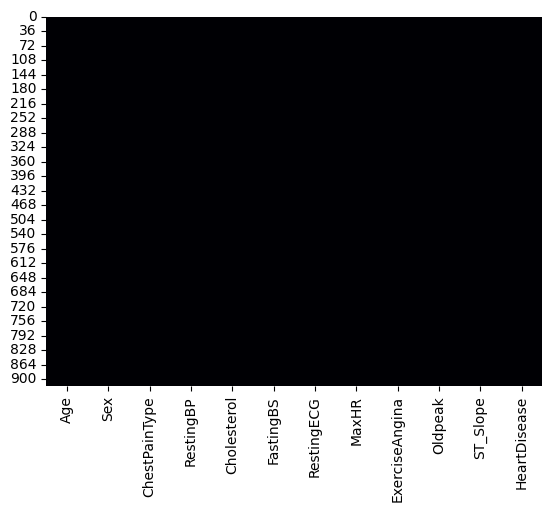

In [116]:
#checking for nulls
sns.heatmap(heart.isnull(),cmap = 'magma',cbar = False);

In [117]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


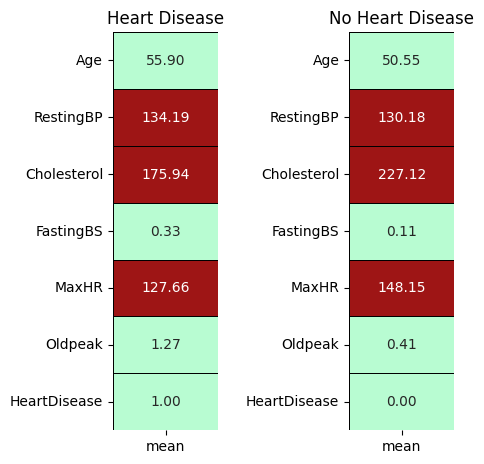

In [118]:
#Finding mean values for both heart disease and no heart disease
yes = heart[heart['HeartDisease'] == 1].describe().T
no = heart[heart['HeartDisease'] == 0].describe().T
colors = ['#b8fcd2','#9e1515']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [119]:
#Dividing features into numerical and categorical
col = list(heart.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(heart[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = heart.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

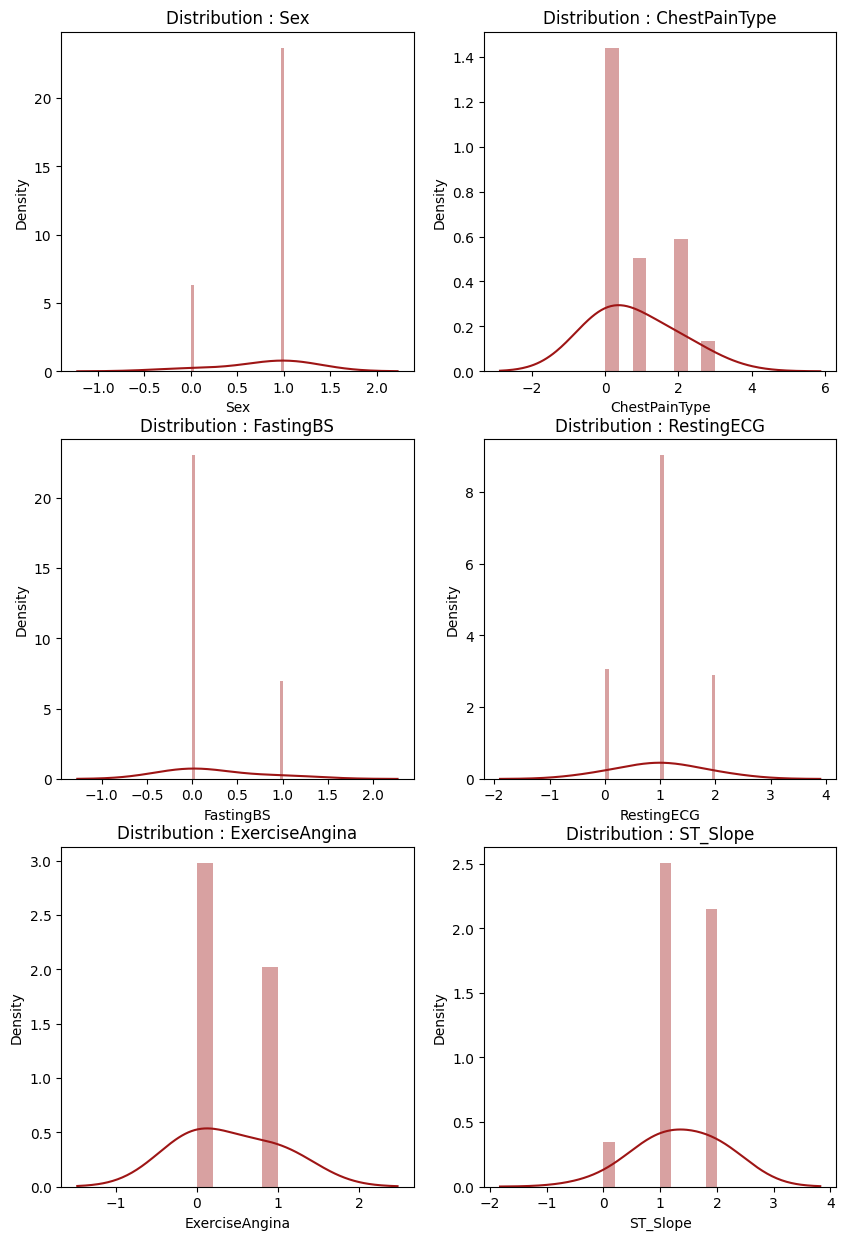

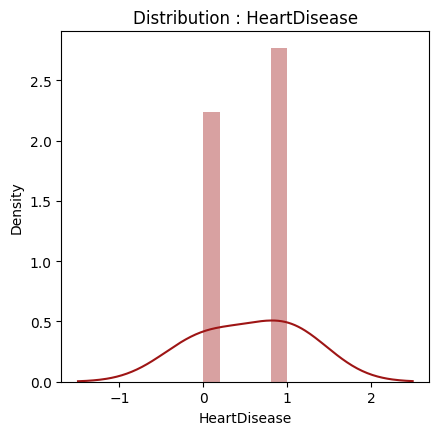

In [121]:
#Plotting distribution of categorical features.
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[1]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[1])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

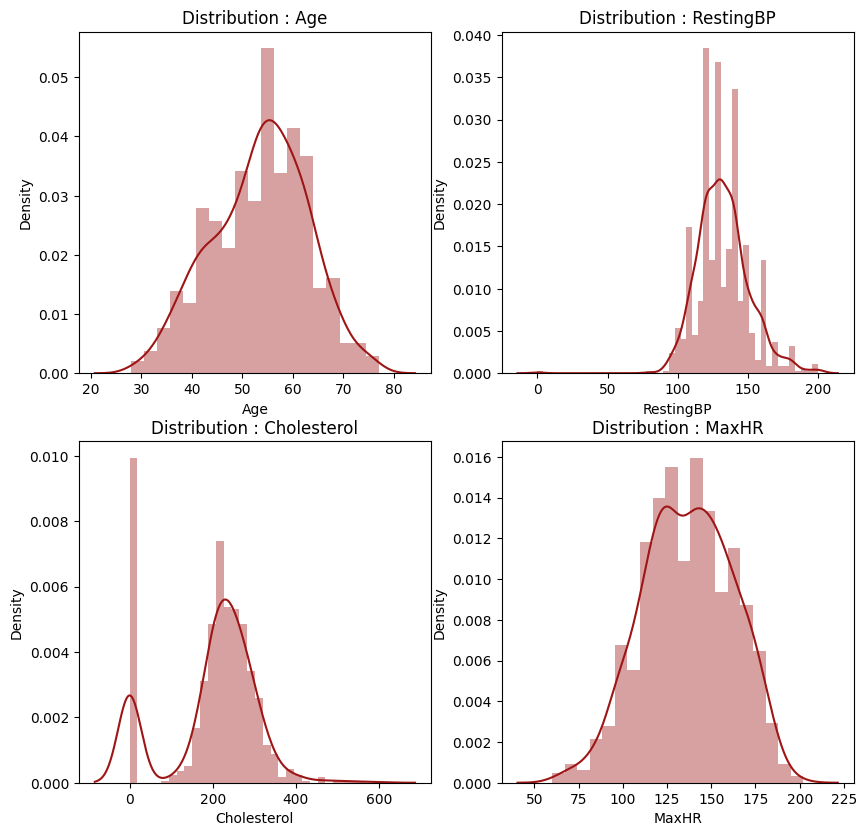

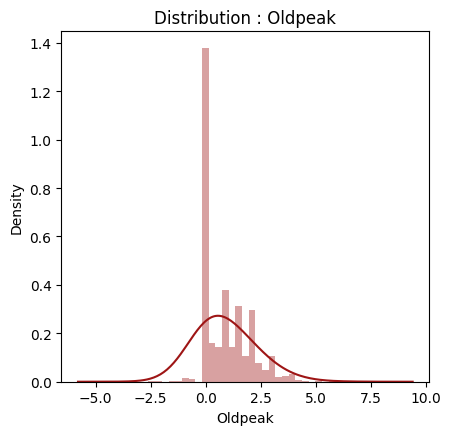

In [122]:
#Plotting distribution of numerical features
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(heart[numerical_features[i]],color = colors[1])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[1])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

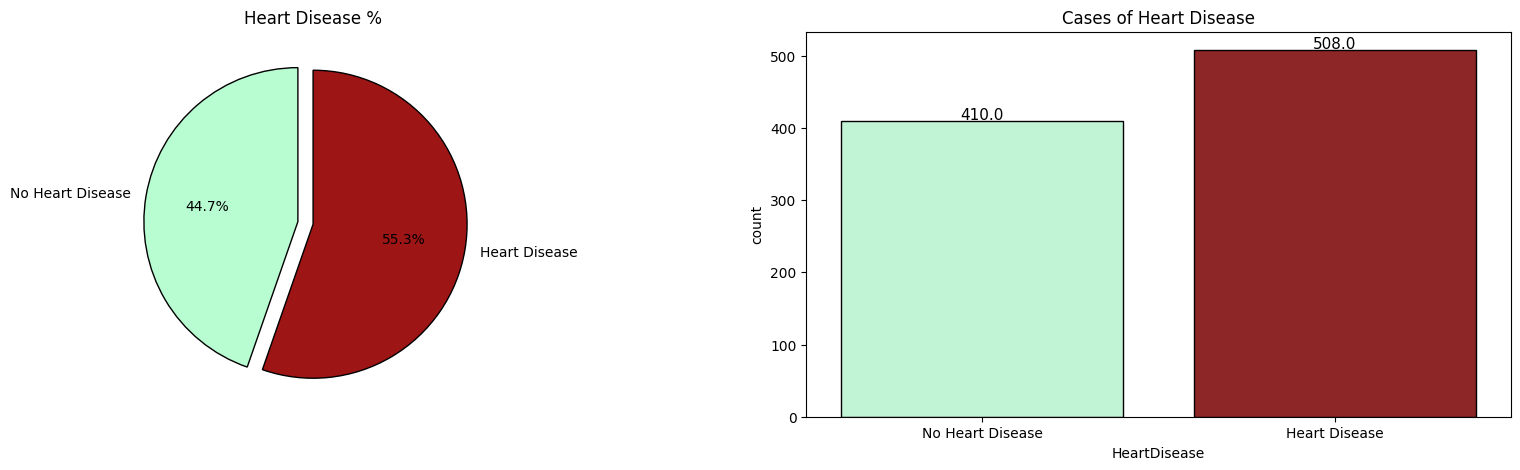

In [123]:
#Visualization of target variable.
l = list(heart['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data = heart,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()


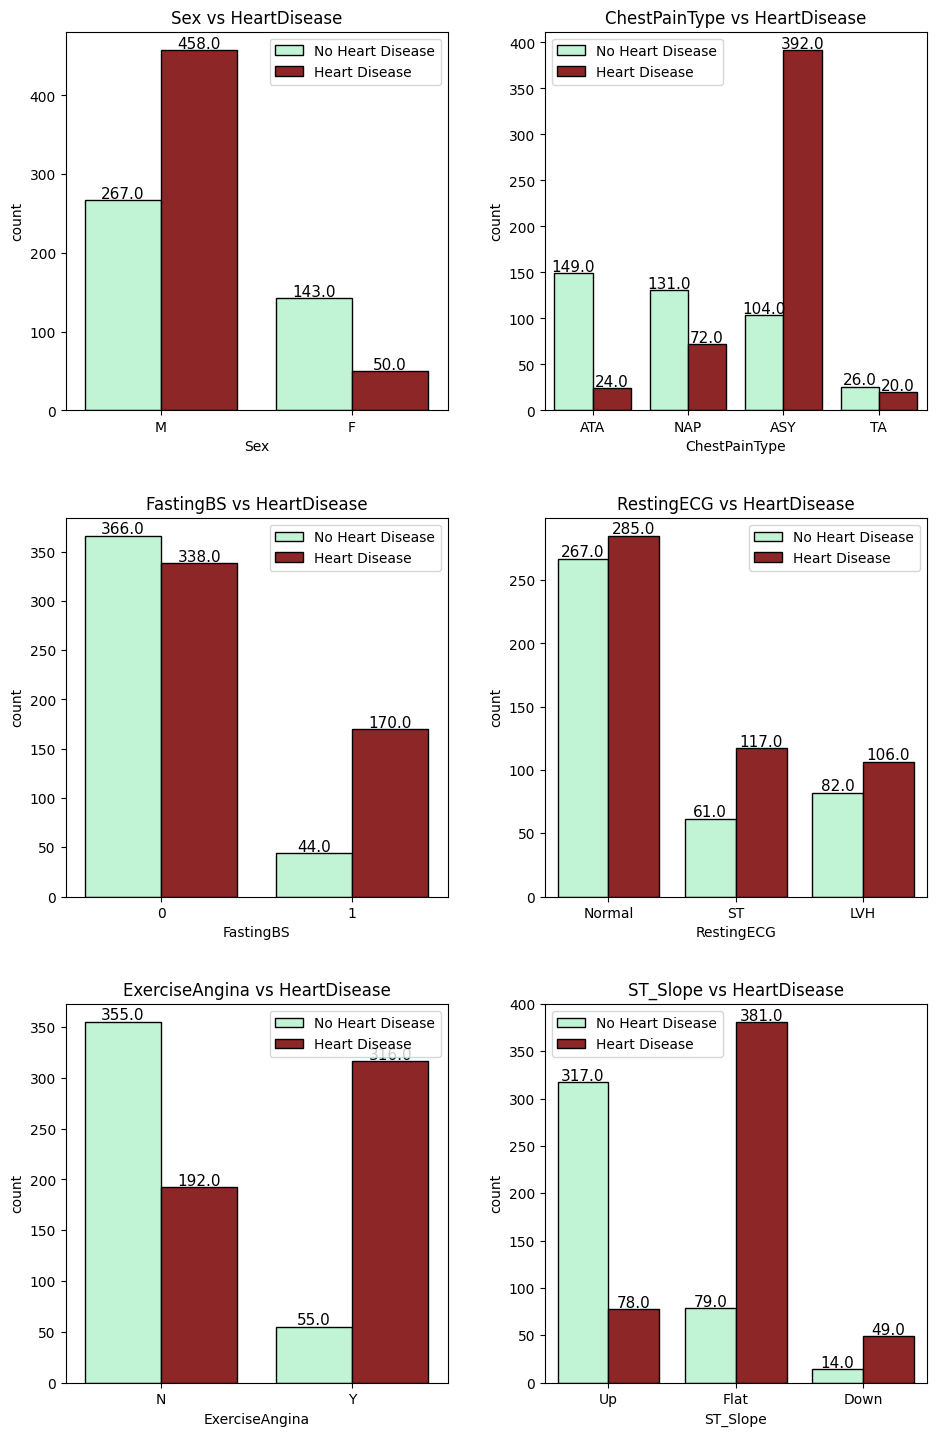

In [124]:
#Plotting Categorical Features vs Target Variable
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

for i, feature in enumerate(categorical_features[:-1]):
    row = i // 2
    col = i % 2
    ax = sns.countplot(x=feature, data=heart, hue="HeartDisease", palette=colors, edgecolor='black', ax=axs[row, col])
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:  # Only add text annotations if the bar has a height greater than 0
            ax.text(rect.get_x() + rect.get_width() / 2, height + 2, height, ha='center', fontsize=11)
    title = f'{feature} vs HeartDisease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

fig.tight_layout(pad=3.0)  # Adjust padding as necessary
plt.show()


In [125]:
sex = heart[heart['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = heart[heart['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = heart[heart['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = heart[heart['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = heart[heart['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = heart[heart['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

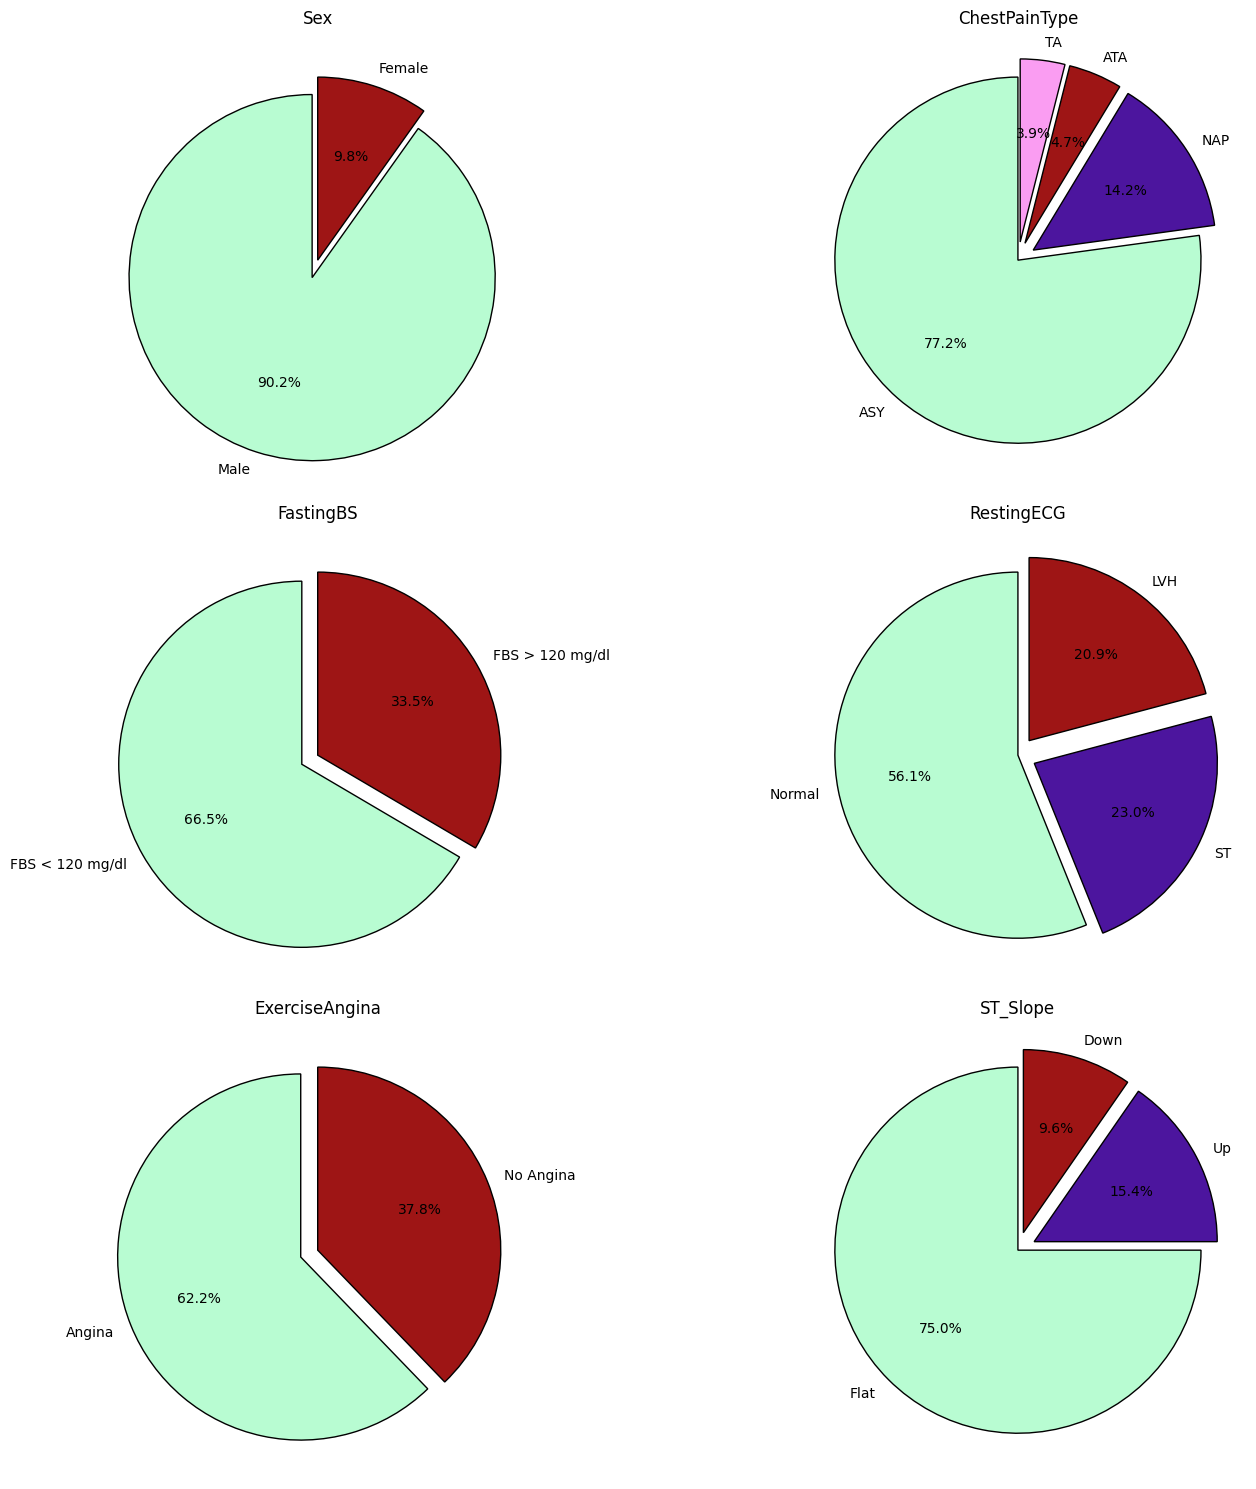

In [126]:
#Plotting Categorical Features vs Positive Heart Disease Cases
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')
ax[0, 0].axis('off')  # Hide the x and y axes for this subplot

plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),colors=['#b8fcd2','#4c159e','#9e1515','#fa9df2'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')
ax[0, 1].axis('off')  # Hide the x and y axes for this subplot

plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')
ax[1, 0].axis('off')  # Hide the x and y axes for this subplot

plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        colors =['#b8fcd2','#4c159e','#9e1515'],wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')
ax[1, 1].axis('off')  # Hide the x and y axes for this subplot

plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')
ax[2, 0].axis('off')  # Hide the x and y axes for this subplot

plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        colors =['#b8fcd2','#4c159e','#9e1515'],wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')
ax[2, 1].axis('off')  # Hide the x and y axes for this subplot

# Adjust the indices for the last two subplots
ax[3, 0].axis('off')  # Hide the x and y axes for this subplot
ax[3, 1].axis('off')  # Hide the x and y axes for this subplot

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


In [127]:
heart['RestingBP_Group'] = [ int(i / 5) for i in heart['RestingBP']]
heart['Cholesterol_Group'] = [ int(i / 10) for i in heart['Cholesterol']]
heart['MaxHR_Group'] = [ int(i / 5) for i in heart['MaxHR']]
heart['Oldpeak_Group'] = [ int( (i*10) / 5) for i in heart['Oldpeak']]


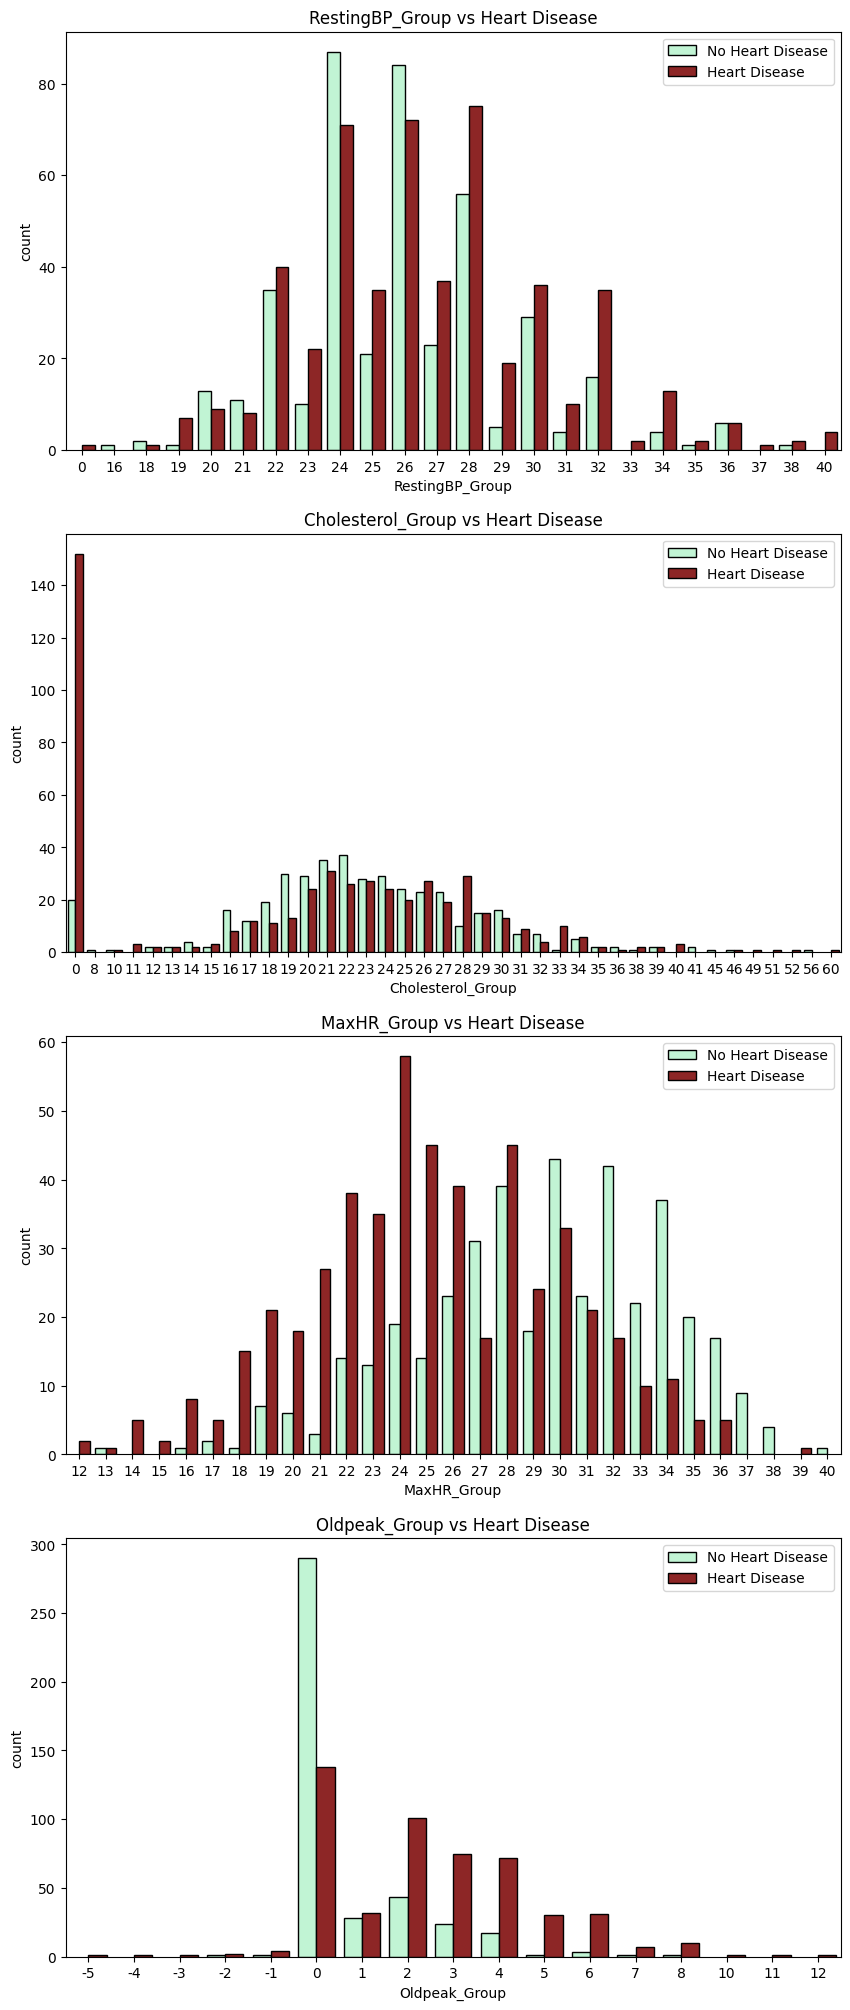

In [128]:
#Plotting Numerical Features vs Target Variable
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = heart,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

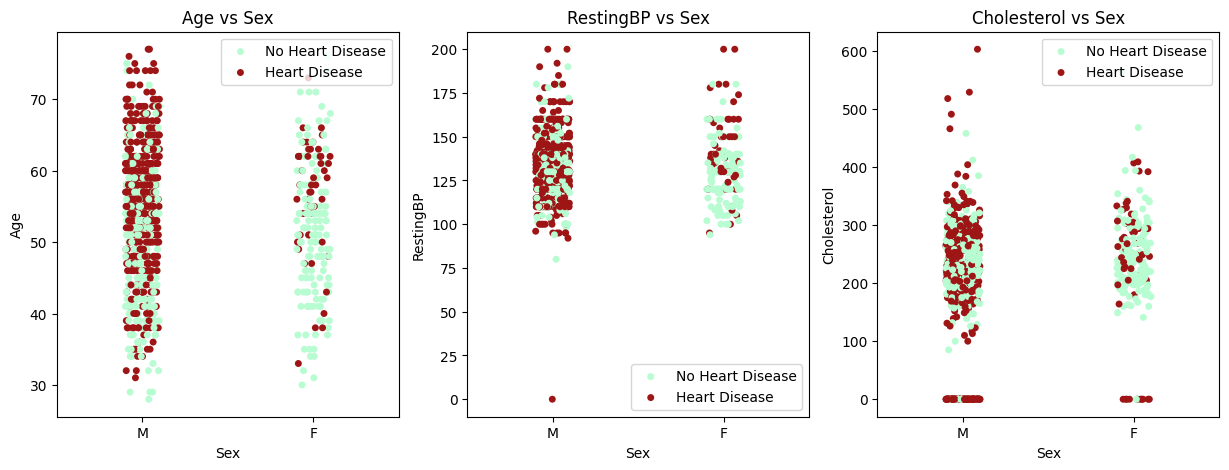

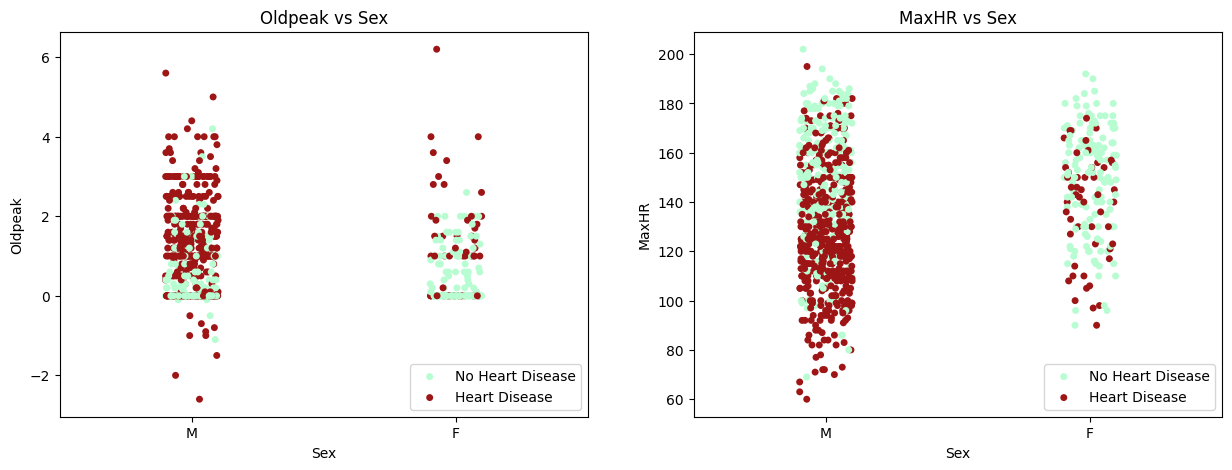

In [129]:
#PLotting Numerical features vs Categorical features(Sex)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

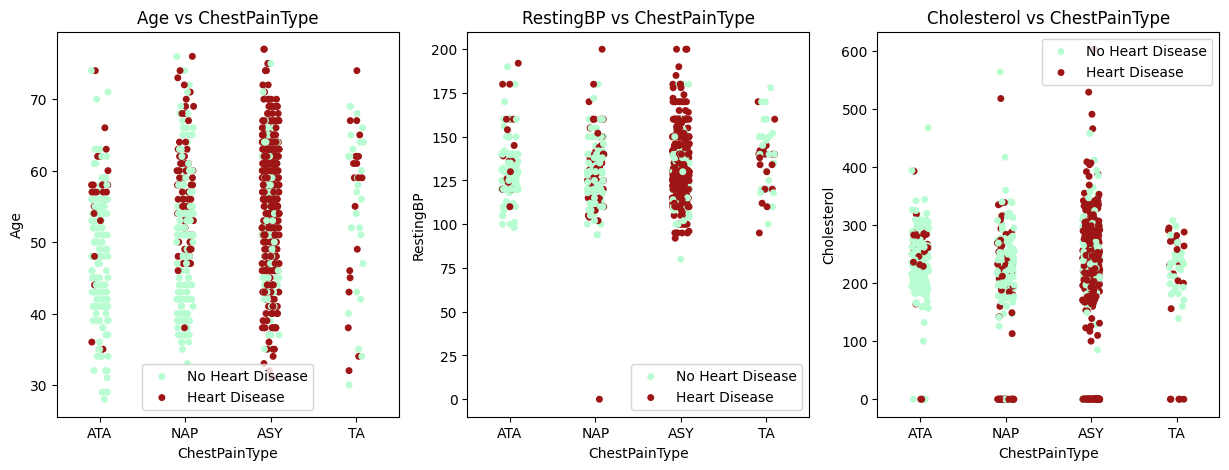

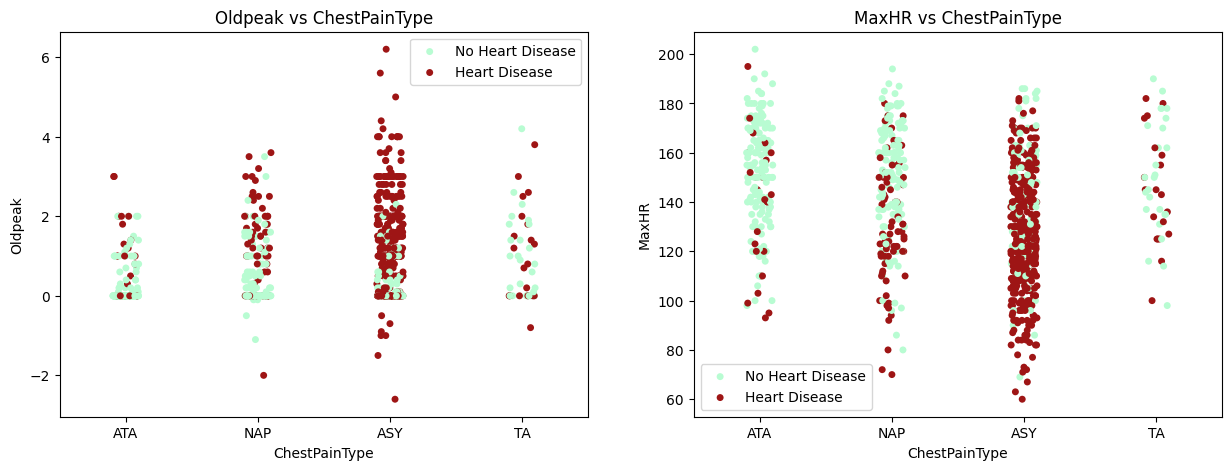

In [130]:
#PLotting Numerical features vs Categorical features(ChestPainType)

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);


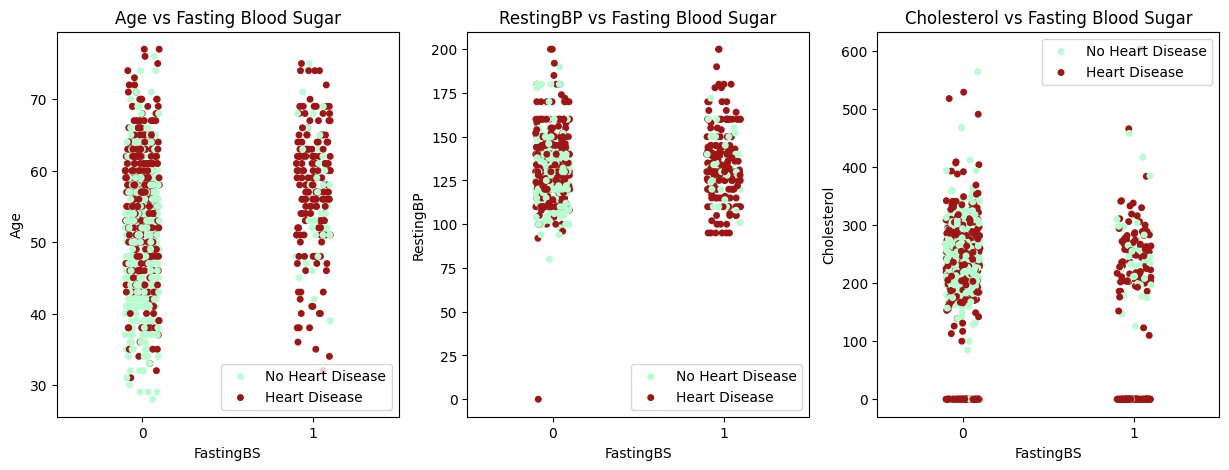

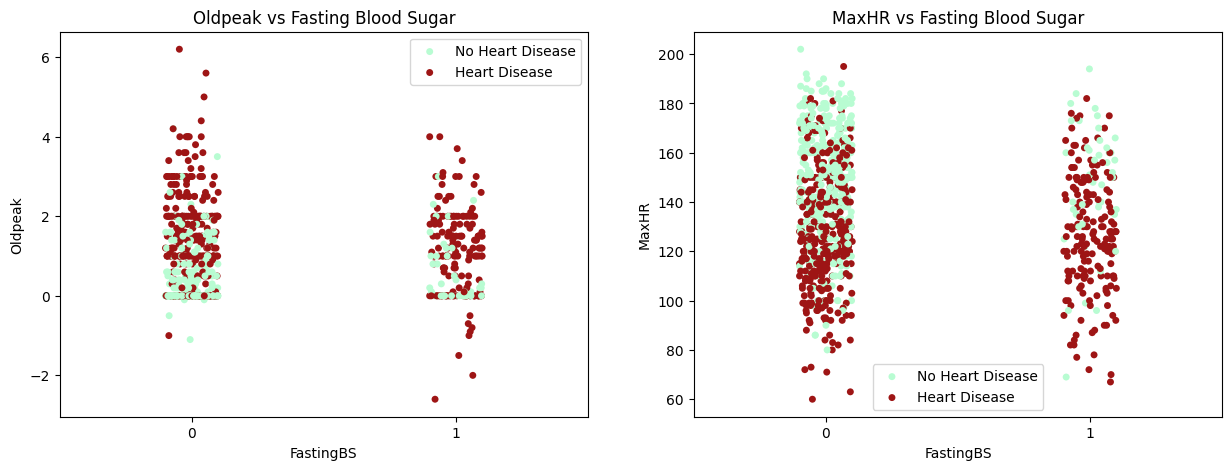

In [131]:
#PLotting Numerical features vs Categorical features(FastingBS)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);


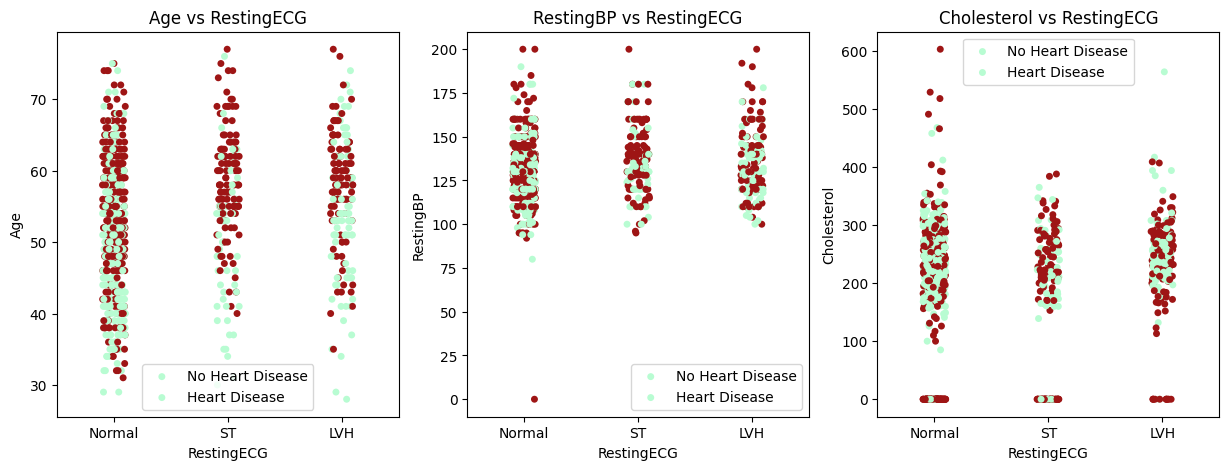

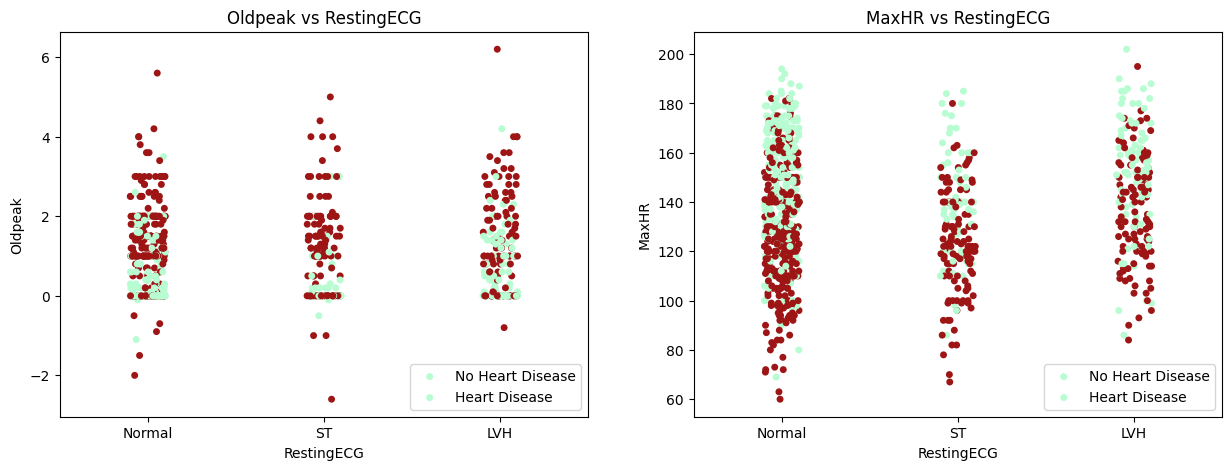

In [132]:
#PLotting Numerical features vs Categorical features(RestingECG)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

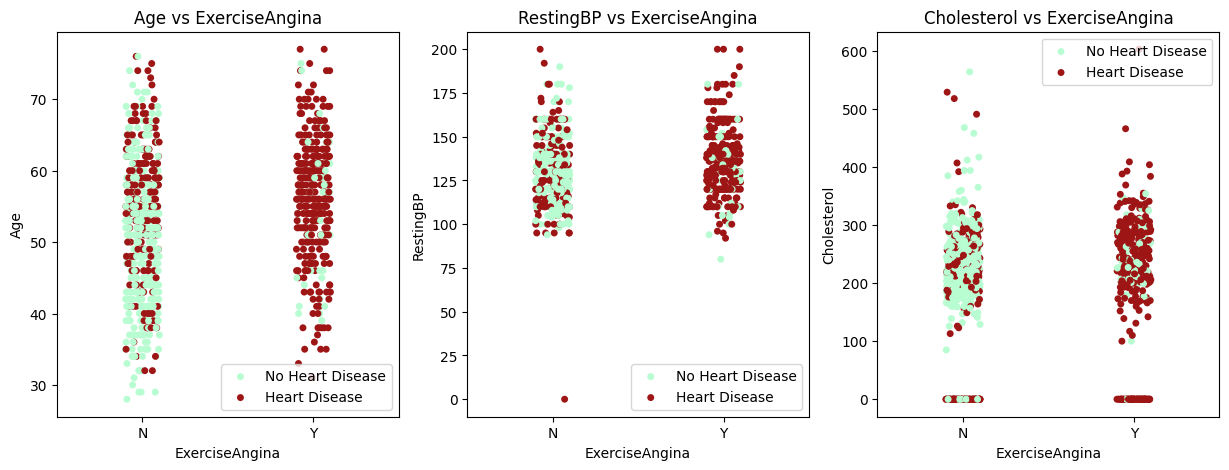

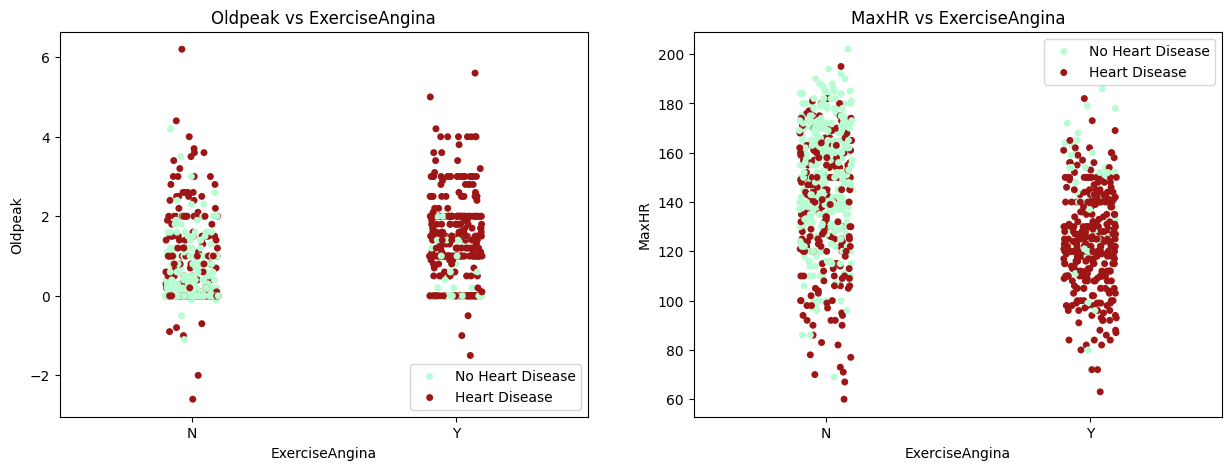

In [133]:
#PLotting Numerical features vs Categorical features(ExerciseAngina)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);


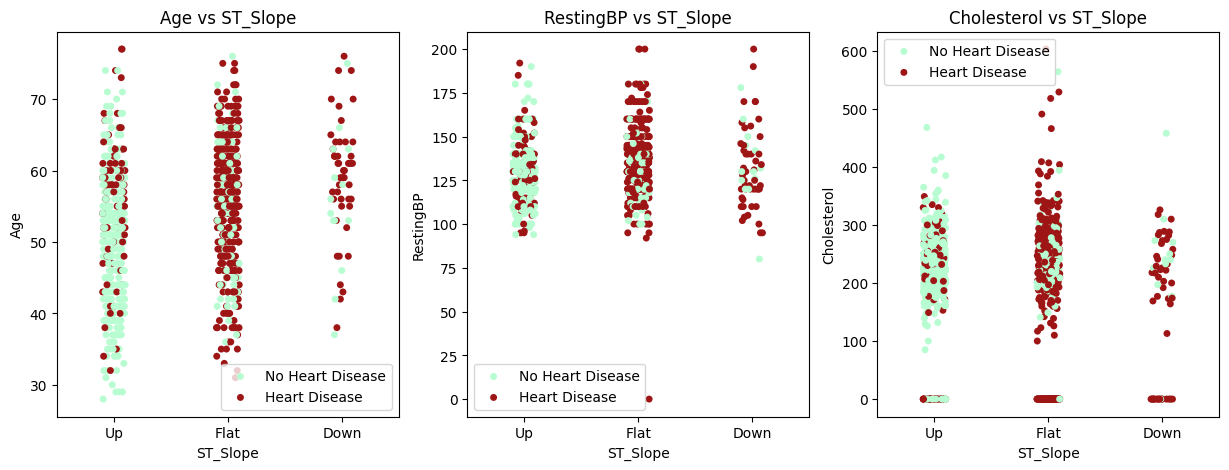

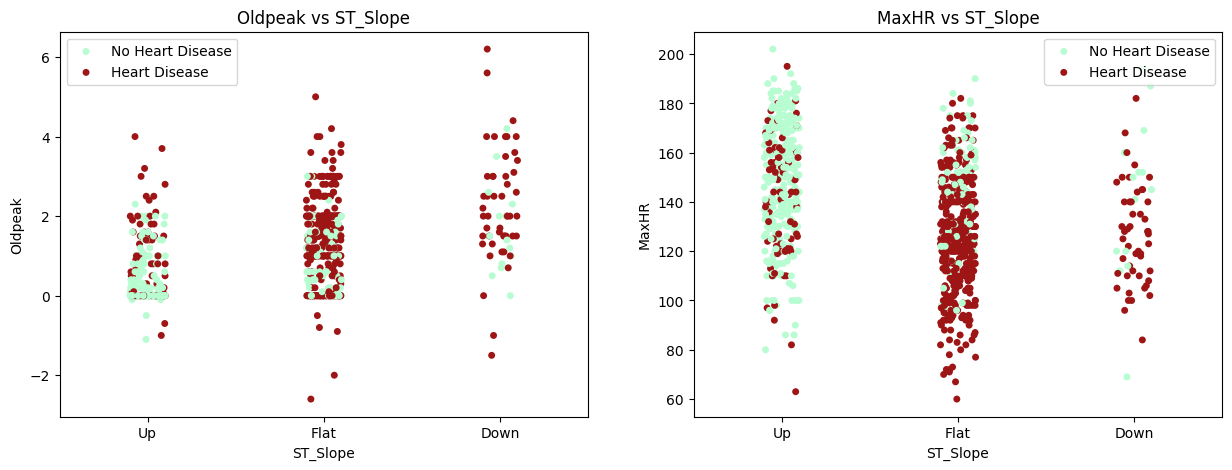

In [134]:
#PLotting Numerical features vs Categorical features(ST_Slope)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = heart,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

In [135]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


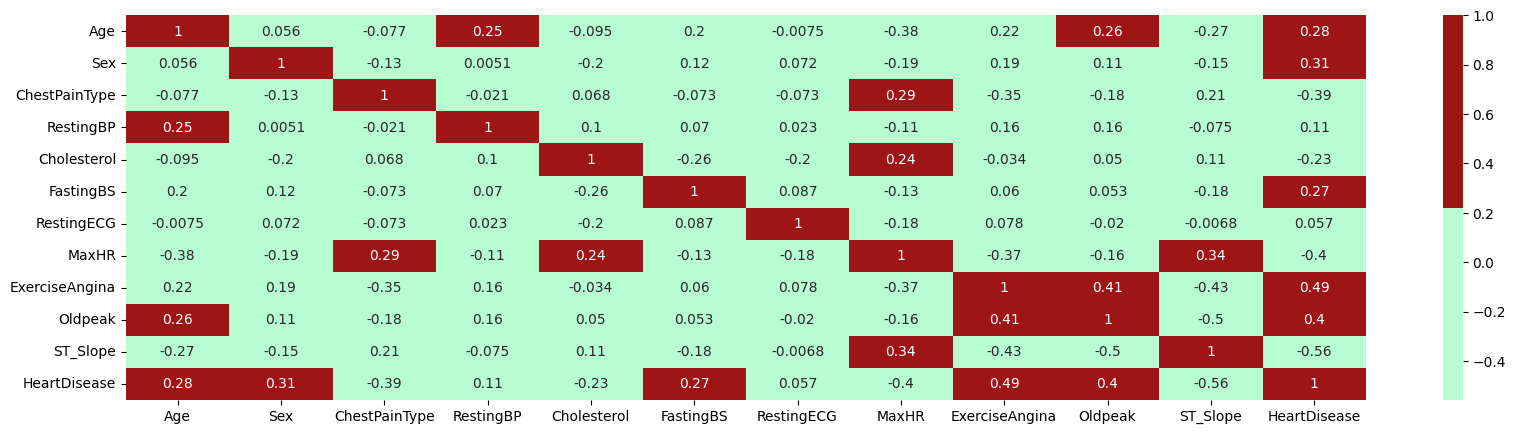

In [136]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);


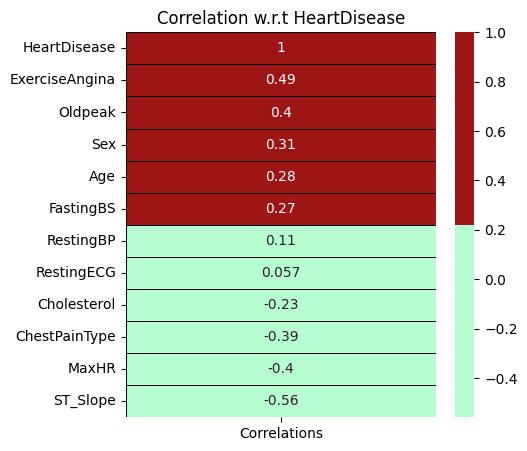

In [137]:
#Finding correlation
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');


In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


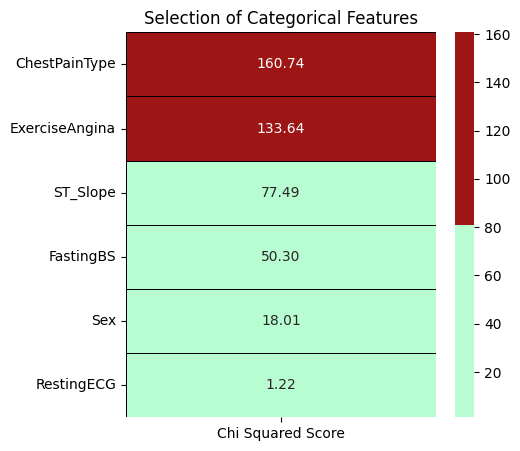

In [139]:
#Chi squared test
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

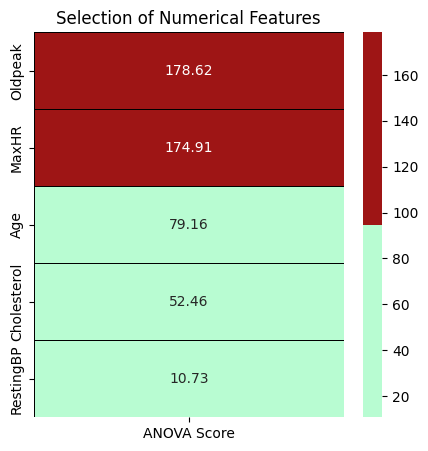

In [140]:
#Annova test
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import seaborn as sns

In [142]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
#Splitting data into 80:20
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [143]:
#Classifier
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr, color='#4c159e', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='#b8fcd2', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap =['#4c159e','#b8fcd2'],fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))



Accuracy :  87.50%
Cross Validation Score :  91.12%
ROC_AUC Score :  87.43%


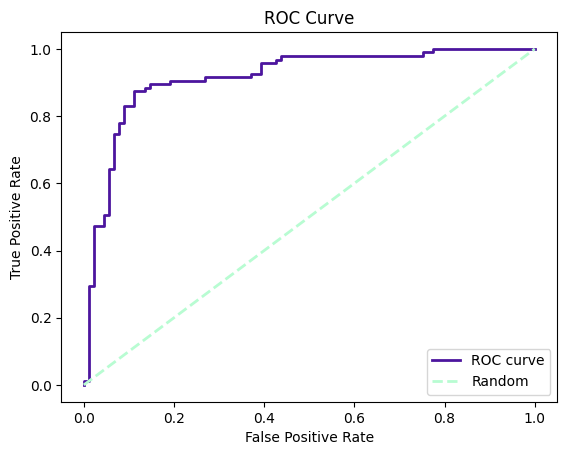

In [144]:
#Modelling - Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



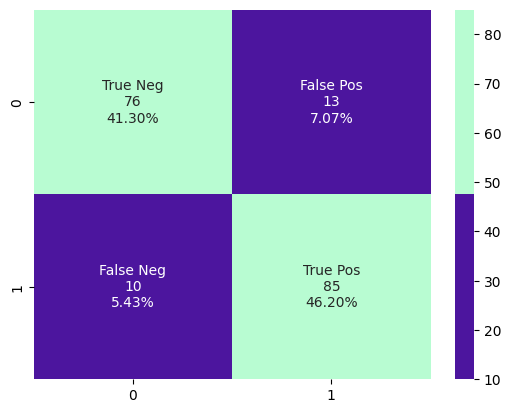

In [145]:
model_evaluation(classifier_lr)

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


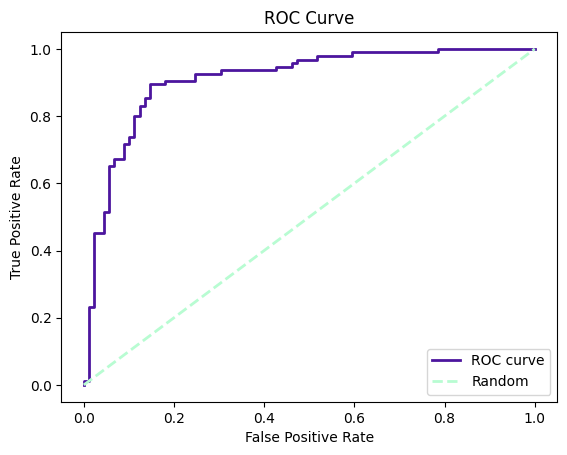

In [146]:
#Modelling - SVC

from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1,probability=True)
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



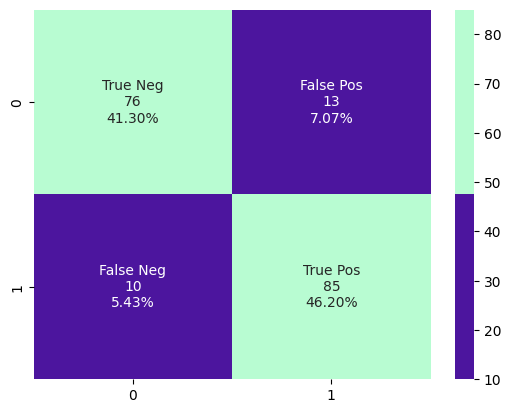

In [147]:
model_evaluation(classifier_svc)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


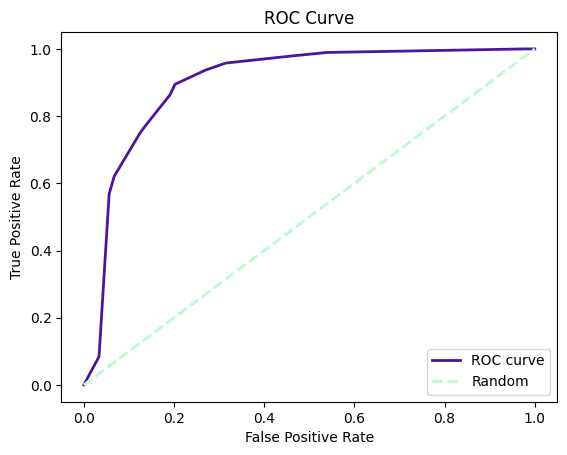

In [148]:
#Modelling - Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt)


              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



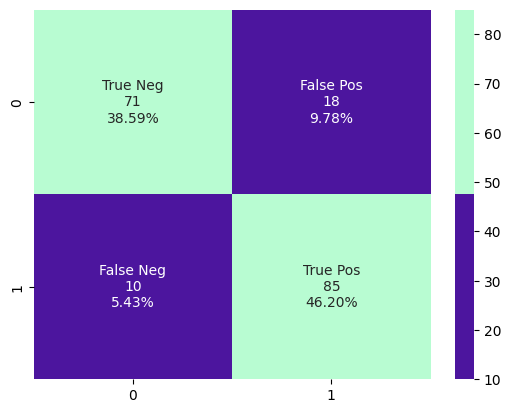

In [149]:
model_evaluation(classifier_dt)

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


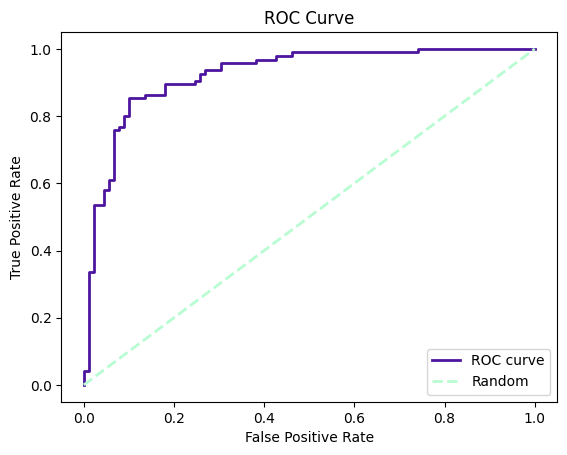

In [150]:
#Modelling - Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



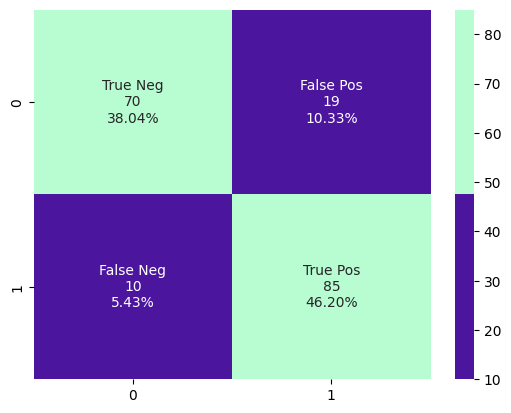

In [151]:
model_evaluation(classifier_rf)

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%


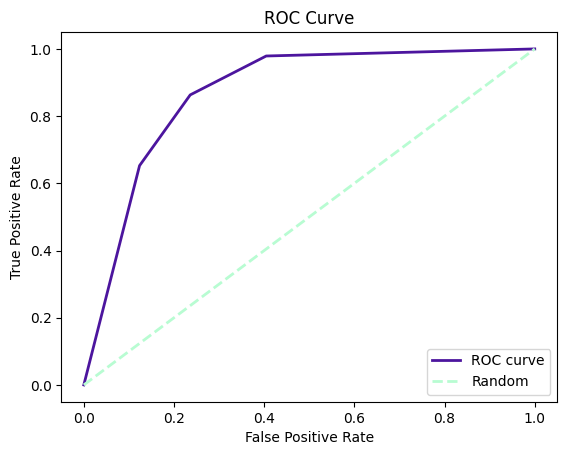

In [152]:
#Modelling - KNN

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



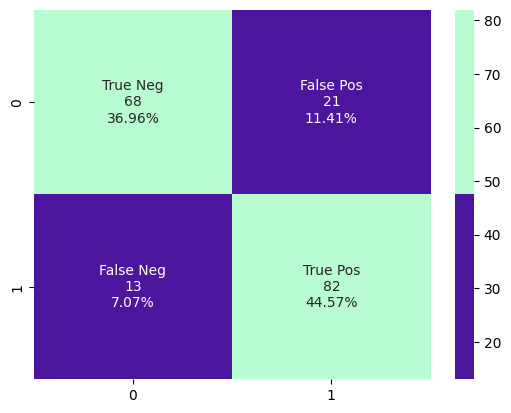

In [153]:
model_evaluation(classifier_knn)

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [155]:
data=pd.read_csv('heart.csv')
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Identify categorical columns (assuming they're of type 'object')
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Reshape for the CNN if necessary (assuming you're using a 1D CNN)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


# Building the CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the CNN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predicting probabilities
y_pred_prob = model.predict(X_test).ravel()


6/6 [==============================] - 0s 2ms/step


6/6 [==============================] - 0s 2ms/step


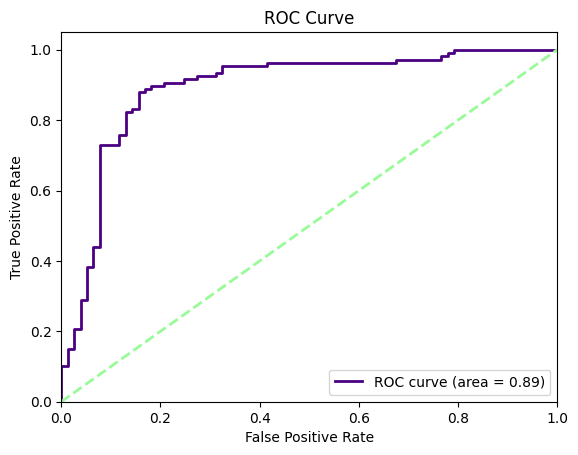

Accuracy: 85.33%
ROC_AUC Score: 89.21%
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy: 0.85


In [156]:
def cnn_model(data):
    # Data Preprocessing
    X = data.drop('HeartDisease', axis=1)
    y = data['HeartDisease']
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
    X_processed = preprocessor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)

    # Building and Compiling the CNN
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)


# Predicting and calculating ROC curve and AUC
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='indigo', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='palegreen', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.2f}%')

# ROC_AUC Score
roc_auc = auc(*roc_curve(y_test, y_pred_prob)[:2])*100
print(f'ROC_AUC Score: {roc_auc:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Model Accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy:.2f}')


In [157]:
cnn_model(data)

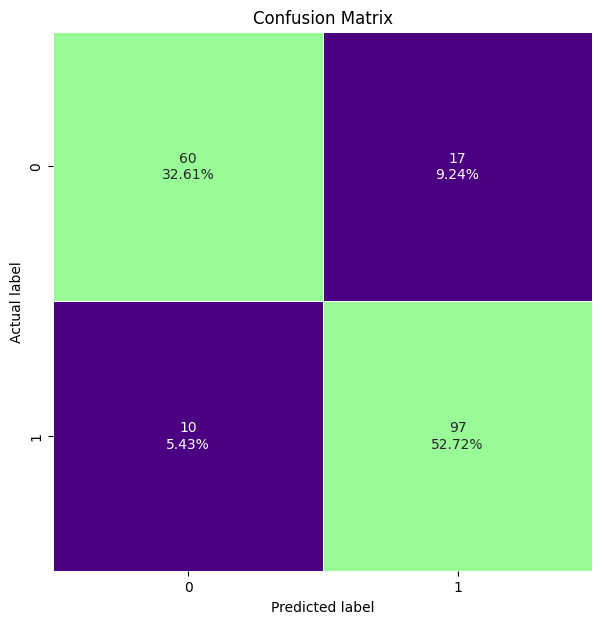

In [158]:
cm = confusion_matrix(y_test, y_pred)
percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# Combine counts with percentages for labels
labels = [f"{v1}\n{v2}" for v1, v2 in zip(cm.flatten(), percentages)]
labels = np.asarray(labels).reshape(2,2)
colors = ["indigo", "palegreen"]

cmap = sns.color_palette(colors)

# Plot the heatmap with labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap=colors, square=True, cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
